In [2]:
### Importing packages 

import numpy as np
import matplotlib.pyplot as plt
import cPickle as p
import glob
import os

In [3]:
### Size of the images

plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size']=20
plt.rcParams['figure.dpi']=200

In [4]:
### Creating a list with all the data files in it

List = glob.glob(os.path.join('./data/', '*.txt'))

In [5]:
### Creating a list with all the pickle files

PickleList = glob.glob(os.path.join('./data/', '*.p'))

In [6]:
List.sort()
PickleList.sort()

In [15]:
Z.keys()

['y', 'x', 'z', 'time']

In [8]:

Z = p.load(open(PickleList[150]))
Zxy_data = Z['z']["data"]
Zxy_bounds = Z['z']["bounds"]
Zxy_time = Z["time"]
Nx,Ny = Zxy_data.shape
Lx = Zxy_bounds[1]-Zxy_bounds[0]
TwoPoint = np.loadtxt(List[150])

AngleMean = TwoPoint.mean(axis=1)  ### Mean over the angle

Zxy_bounds = Z['z']["bounds"]
Lx = Zxy_bounds[1]-Zxy_bounds[0]
print Lx
Nr = 50
print Nr
rMax = Lx/2
print rMax
rindex = np.arange(Nr)
print rindex
dr = rMax/Nr
print dr
r = rindex * dr
print r  ##x-axis
Z_Fluct = Zxy_data
print Zxy_time


1024.0
50
512.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
10.24
[  0.    10.24  20.48  30.72  40.96  51.2   61.44  71.68  81.92  92.16
 102.4  112.64 122.88 133.12 143.36 153.6  163.84 174.08 184.32 194.56
 204.8  215.04 225.28 235.52 245.76 256.   266.24 276.48 286.72 296.96
 307.2  317.44 327.68 337.92 348.16 358.4  368.64 378.88 389.12 399.36
 409.6  419.84 430.08 440.32 450.56 460.8  471.04 481.28 491.52 501.76]
146.66893100619401


In [9]:
Lambda = np.interp(0.5,AngleMean[::-1],r[::-1])
print Lambda

96.1988120903


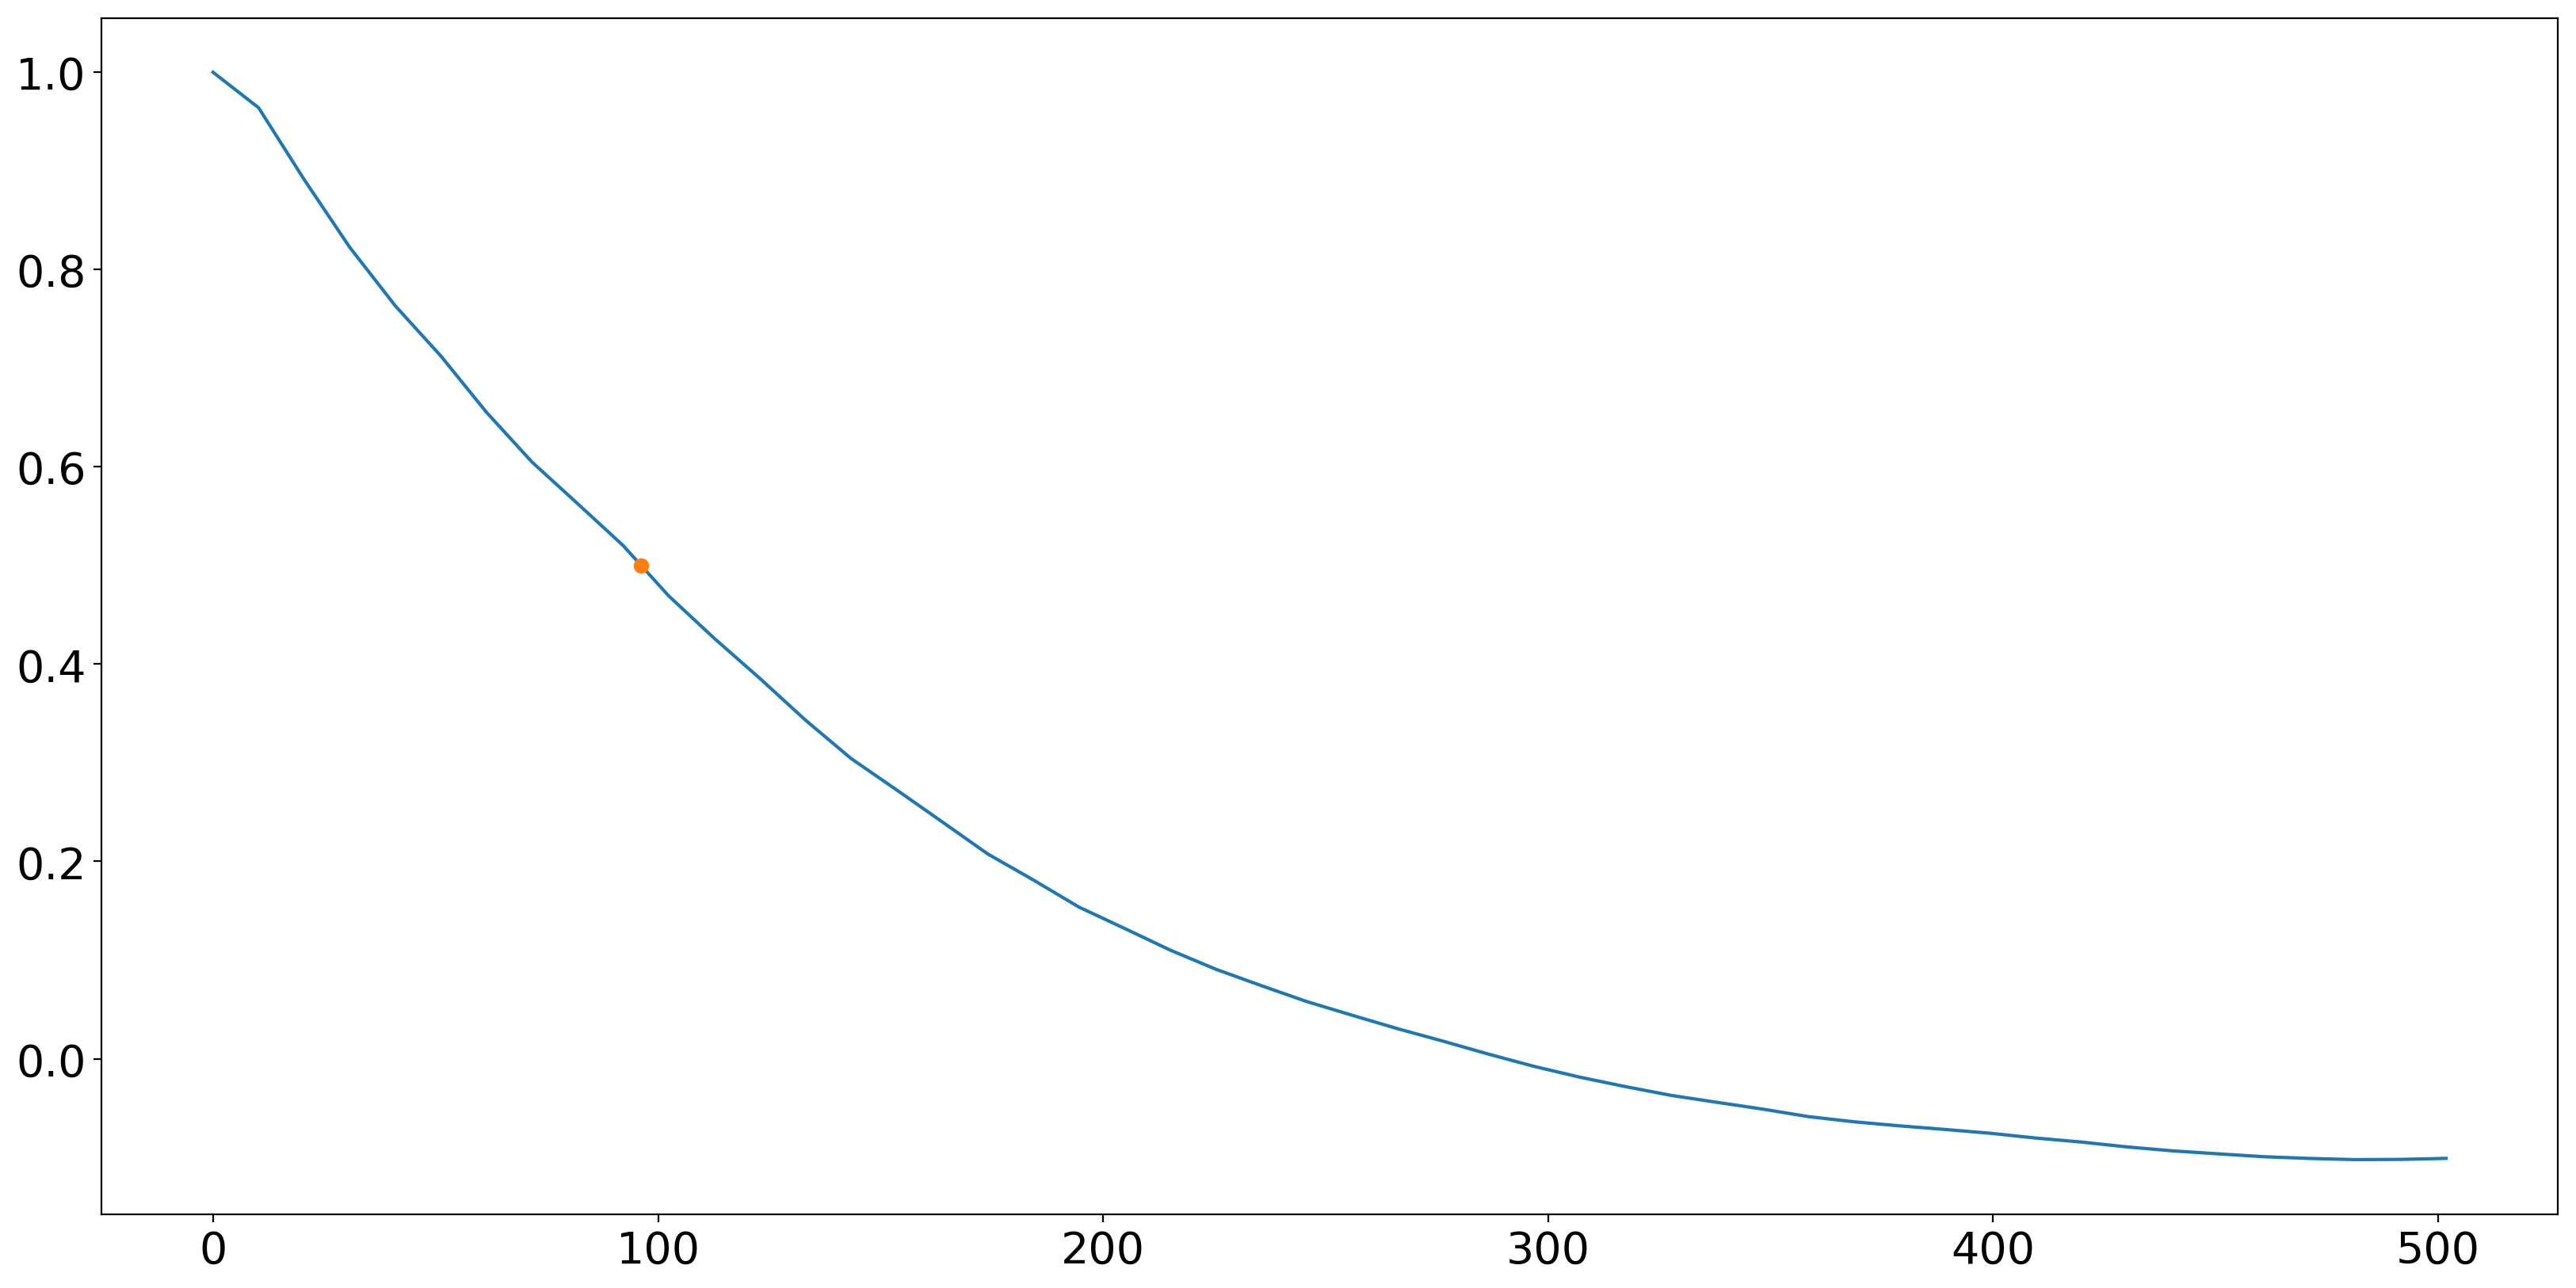

In [10]:
plt.plot(r,AngleMean)
plt.plot(Lambda,0.5,'o')

In [11]:
ArrayLen = len(List)
TimeArray = np.zeros(ArrayLen)
LambdaArray = np.zeros(ArrayLen)

Z = p.load(open(PickleList[0]))
Zxy_bounds = Z['z']["bounds"]
Lx = Zxy_bounds[1]-Zxy_bounds[0]
Nr = 50
rMax = Lx/2
rindex = np.arange(Nr)
dr = rMax/Nr
r = rindex * dr

for i in range(ArrayLen):
    Z = p.load(open(PickleList[i]))
    Zxy_time = Z["time"]
    TwoPoint = np.loadtxt(List[i])
    AngleMean = TwoPoint.mean(axis=1)
    Lambda = np.interp(0.5,AngleMean[::-1],r[::-1])
    TimeArray[i] = Zxy_time
    LambdaArray[i] = Lambda


In [12]:
np.savetxt("LambdaArray.txt",LambdaArray)

In [13]:
np.savetxt("TimeArray.txt",TimeArray)

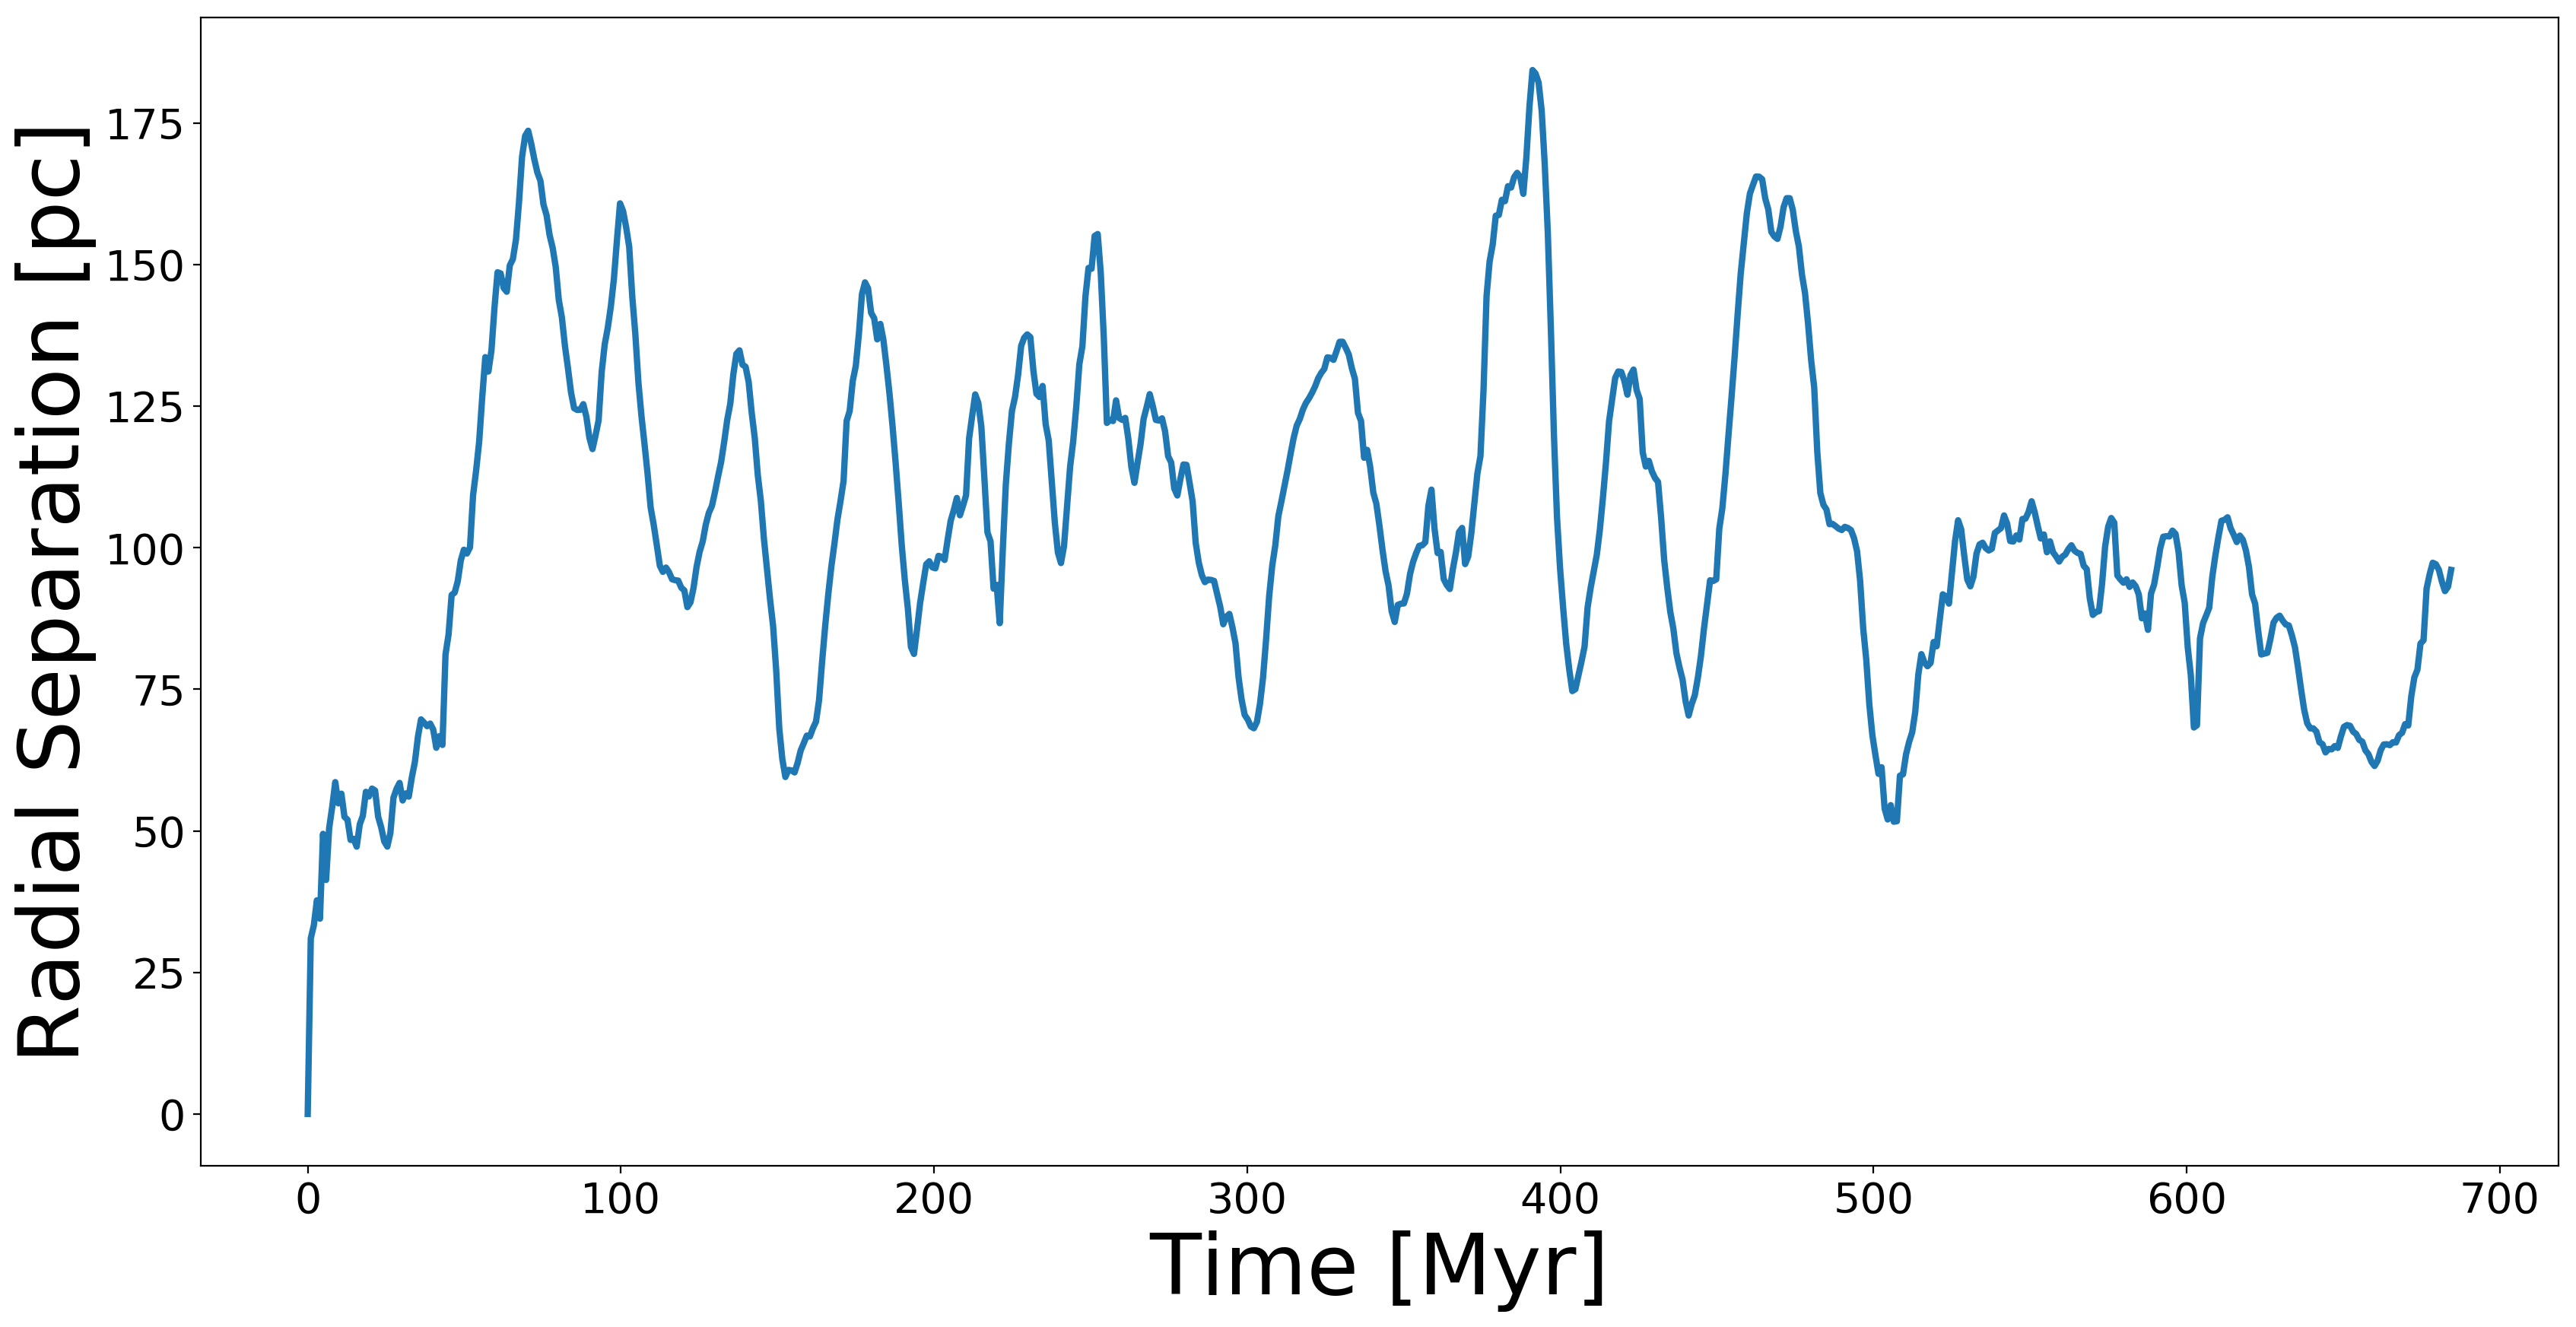

In [16]:
plt.plot(np.loadtxt("TimeArray.txt"),np.loadtxt("LambdaArray.txt"),lw=3)
plt.xlabel("Time [Myr]", fontsize = 40)
plt.ylabel("Radial Separation [pc]", fontsize = 40)

plt.savefig("./"+"LambdaTime.png")